In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from matplotlib import pyplot
from keras.utils import plot_model
from keras.optimizers import SGD

Using TensorFlow backend.


# Train and Test Data from CIFAR10

In [0]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 5s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

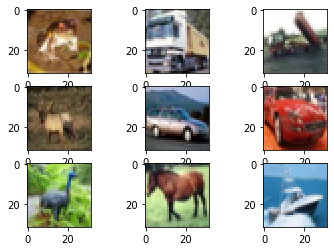

In [0]:
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(x_train[i])
# show the figure
pyplot.show()

In [0]:
# Convert class target variable to binary class matrices.
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [0]:
#convert to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#normalise data by dividing by pixel max range value of 255
x_train /= 255
x_test /= 255






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


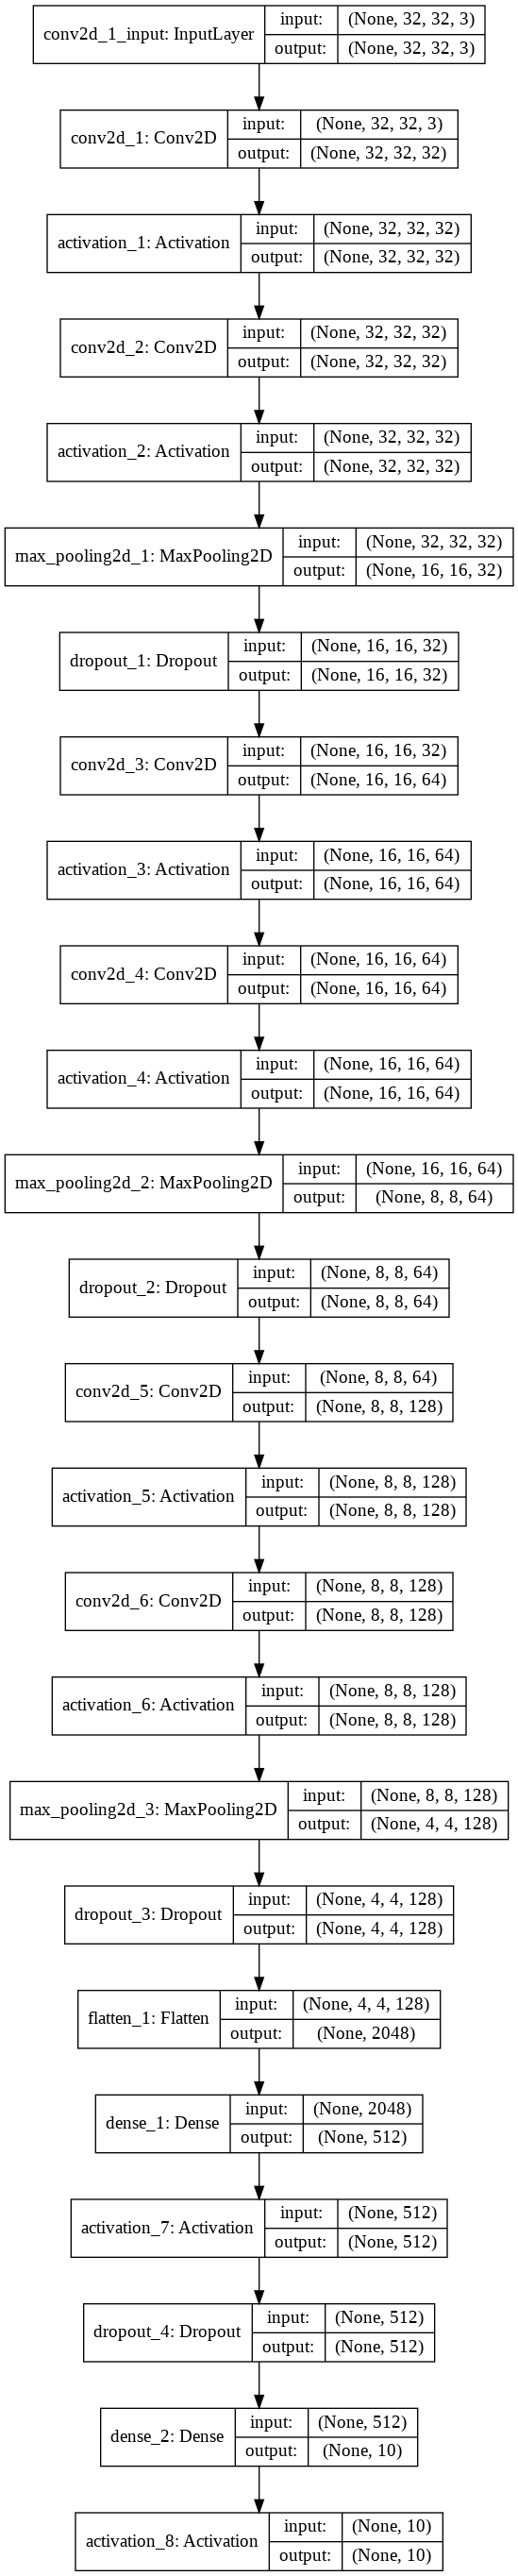

In [0]:
#creating model
#Convolutional layer with Rectified linear unit(Relu) activation
#32 convolution filters used each of size 3x3 and getting output same as input shape by doing padding (32,32,3)
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',kernel_initializer='he_uniform',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3),padding='same',kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Convolutional layer with Rectified linear unit(Relu) activation
#64 convolution filters used each of size 3x3 and getting output same as input shape by doing padding (32,32,3)
model.add(Conv2D(64, (3, 3), padding='same',kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3),kernel_initializer='he_uniform',padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Convolutional layer with Rectified linear unit(Relu) activation
#128 convolution filters used each of size 3x3 and getting output same as input shape by doing padding (32,32,3)
model.add(Conv2D(128, (3, 3), padding='same',kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3),kernel_initializer='he_uniform',padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Flatten since too many dimensions, we only want a classification output.
model.add(Flatten())

#Fully Connected to get all relevant data.
model.add(Dense(512,kernel_initializer='he_uniform'))
model.add(Activation('relu'))


#One more dropout for convergence' sake. 
model.add(Dropout(0.5))
model.add(Dense(num_classes))

#output a Softmax to squash the matrix into output probabilities.
model.add(Activation('softmax'))

plot_model(model,to_file="model.png",show_shapes=True,rankdir='TB',expand_nested=True)

In [0]:
# Let's train the model using RMSprop

opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [0]:
batch_size = 32
num_classes = 10
epochs = 70
#data_augmentation = True
num_predictions = 20

history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test),shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/70





50000/50000 [==============================] - 406s 8ms/step - loss: 1.9535 - acc: 0.2695 - val_loss: 1.6470 - val_acc: 0.4006
Epoch 2/70
50000/50000 [==============================] - 404s 8ms/step - loss: 1.5781 - acc: 0.4170 - val_loss: 1.4046 - val_acc: 0.4833
Epoch 3/70
50000/50000 [==============================] - 405s 8ms/step - loss: 1.4160 - acc: 0.4788 - val_loss: 1.2569 - val_acc: 0.5482
Epoch 4/70
50000/50000 [==============================] - 405s 8ms/step - loss: 1.3075 - acc: 0.5243 - val_loss: 1.1615 - val_acc: 0.5845
Epoch 5/70
50000/50000 [==============================] - 405s 8ms/step - loss: 1.2118 - acc: 0.5597 - val_loss: 1.0902 - val_acc: 0.6136
Epoch 6/70
50000/50000 [==============================] - 406s 8ms/step - loss: 1.1380 - acc: 0.5909 - val_loss: 1.0006 - val_acc: 0.6532
Epoch 7/70
50000/500

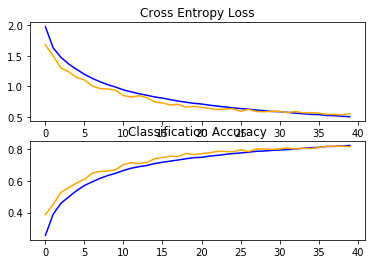

In [0]:
# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['acc'], color='blue', label='train')
	pyplot.plot(history.history['val_acc'], color='orange', label='test')